# **Stellar Classification**
The project is live: https://stellar-classify.herokuapp.com/

-------------

## **Objective**

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. Aim is to classify the stellar object has Star/Galaxy/Quasar

## **Data Source**

https://www.kaggle.com/palak2202/stellar-classification

## **Import Library**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **Import Data**

In [2]:
#Download Link https://drive.google.com/file/d/1JCd_hoC2iEsDSSW3fFloZWANkfcBzddm/view?usp=sharing
df = pd.read_csv(r"C:\Users\pavan\Desktop\My Projects\stellar classification\archive\star_classification.csv")

## **Describe Data**

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [3]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df.value_counts()

obj_ID        alpha       delta      u         g         r         i         z         run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID   class   redshift   plate  MJD    fiber_ID
1.237681e+18  357.780221  31.016133  27.05254  23.44684  21.81484  20.77514  19.93920  8162    301       6        234       8.728208e+18  GALAXY   0.570286  7752   58072  845         1
1.237661e+18  227.068820  42.004869  25.43511  22.97782  21.65517  20.64193  19.93064  3664    301       5        103       9.594959e+18  GALAXY   0.732276  8522   58193  145         1
              225.857951  42.714195  25.10069  24.61131  22.15284  20.67461  19.61880  3664    301       5        96        9.595088e+18  GALAXY   0.948882  8522   58193  615         1
              226.102944  42.452929  22.17629  21.68726  20.47007  19.59967  19.31135  3664    301       5        97        6.816392e+18  GALAXY   0.570772  6054   56089  705         1
              226.223161  42.547189  24.20759  25.01221  21.82784  20.35639  19.

In [7]:
df.isnull().value_counts()

obj_ID  alpha  delta  u      g      r      i      z      run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID  class  redshift  plate  MJD    fiber_ID
False   False  False  False  False  False  False  False  False   False     False    False     False        False  False     False  False  False       100000
dtype: int64

In [8]:
df.cov()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,7.120929e+25,-1.118499e+13,-4.993681e+13,4.104389e+12,4.209231e+12,2.408626e+12,2.190548e+12,3.697865e+12,1.657978e+16,0.0,-6.293507e+11,3.960622e+13,6.716847e+30,4.032653e+11,5.965720e+15,4.008871e+15,1.544743e+14
alpha,-1.118499e+13,9.312682e+03,2.629241e+02,-4.695842e+00,-7.422666e+00,-3.952593e+00,-4.000132e+00,-8.933732e+00,-2.604547e+03,0.0,2.998821e+00,-2.380979e+03,-8.190697e+17,1.175579e-01,-7.276757e+02,3.480548e+03,8.010969e+02
delta,-4.993681e+13,2.629241e+02,3.859129e+02,1.294097e+00,2.197617e+00,-2.490271e-01,-1.547185e-01,2.262319e+00,-1.162694e+04,0.0,1.015189e+00,-5.076369e+02,7.334983e+18,4.541536e-01,6.514736e+03,3.813226e+03,1.512254e+02
u,4.104389e+12,-4.695842e+00,1.294097e+00,1.009288e+03,1.007989e+03,3.190689e+00,2.553903e+00,1.006058e+03,9.556058e+02,0.0,1.788911e-01,-3.964403e+01,3.167703e+18,3.321681e-01,2.813451e+03,1.838362e+03,1.411519e+02
g,4.209231e+12,-7.422666e+00,2.197617e+00,1.007989e+03,1.008081e+03,3.673939e+00,3.140701e+00,1.006533e+03,9.800164e+02,0.0,1.767692e-01,-4.188022e+01,4.162803e+18,5.325377e-01,3.697275e+03,2.312548e+03,1.511469e+02
r,2.408626e+12,-3.952593e+00,-2.490271e-01,3.190689e+00,3.673939e+00,3.440134e+00,3.139404e+00,3.158788e+00,5.607988e+02,0.0,2.495887e-02,-7.302882e+00,4.039749e+18,5.871653e-01,3.587990e+03,2.251342e+03,1.127620e+02
i,2.190548e+12,-4.000132e+00,-1.547185e-01,2.553903e+00,3.140701e+00,3.139404e+00,3.090194e+00,3.123057e+00,5.100242e+02,0.0,2.124163e-02,-6.988373e+00,3.866149e+18,6.324697e-01,3.433805e+03,2.138034e+03,1.028882e+02
z,3.697865e+12,-8.933732e+00,2.262319e+00,1.006058e+03,1.006533e+03,3.158788e+00,3.123057e+00,1.006676e+03,8.609558e+02,0.0,1.694101e-01,-4.209063e+01,3.987927e+18,7.043310e-01,3.541960e+03,2.149987e+03,1.268219e+02
run_ID,1.657978e+16,-2.604547e+03,-1.162694e+04,9.556058e+02,9.800164e+02,5.607988e+02,5.100242e+02,8.609558e+02,3.860300e+06,0.0,-1.468469e+02,9.221667e+03,1.563890e+21,9.389253e+01,1.389004e+06,9.333908e+05,3.595979e+04
rerun_ID,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
df.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [11]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [12]:
df[df['class']=='QSO']

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
17,1.237679e+18,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,301,5,339,9.843824e+18,QSO,2.031528,8743,57663,295
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
33,1.237679e+18,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,7773,301,2,441,1.246830e+19,QSO,1.528308,11074,58488,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,1.237655e+18,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,2243,301,4,128,8.458979e+18,QSO,0.219966,7513,56780,339
99966,1.237662e+18,222.761686,32.203212,20.23421,19.76480,19.46940,19.36135,19.21768,3900,301,1,583,4.356138e+18,QSO,0.398574,3869,55273,112
99968,1.237656e+18,259.504325,31.462416,24.86685,23.22772,21.82982,21.80359,21.56733,2335,301,5,107,1.312146e+19,QSO,1.239638,11654,58543,812
99977,1.237661e+18,217.958430,52.316738,24.15617,22.05986,21.80826,21.95129,21.24179,3705,301,2,124,7.916218e+18,QSO,1.067543,7031,56449,58


In [14]:
qso = df[df['class']=='QSO']

In [15]:
qso

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
17,1.237679e+18,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,7712,301,5,339,9.843824e+18,QSO,2.031528,8743,57663,295
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
33,1.237679e+18,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,7773,301,2,441,1.246830e+19,QSO,1.528308,11074,58488,306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,1.237655e+18,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,2243,301,4,128,8.458979e+18,QSO,0.219966,7513,56780,339
99966,1.237662e+18,222.761686,32.203212,20.23421,19.76480,19.46940,19.36135,19.21768,3900,301,1,583,4.356138e+18,QSO,0.398574,3869,55273,112
99968,1.237656e+18,259.504325,31.462416,24.86685,23.22772,21.82982,21.80359,21.56733,2335,301,5,107,1.312146e+19,QSO,1.239638,11654,58543,812
99977,1.237661e+18,217.958430,52.316738,24.15617,22.05986,21.80826,21.95129,21.24179,3705,301,2,124,7.916218e+18,QSO,1.067543,7031,56449,58


In [16]:
star = df[df['class']=='STAR']

In [17]:
star

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232
12,1.237681e+18,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,8157,301,2,38,7.323011e+18,STAR,0.000072,6504,56540,574
16,1.237679e+18,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,7712,301,5,284,4.822278e+18,STAR,-0.000429,4283,55864,178
18,1.237679e+18,14.383135,3.214326,21.82154,20.55730,19.94918,19.76057,19.55514,7712,301,5,425,9.855073e+18,STAR,-0.000440,8753,57373,258
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,STAR,-0.000120,7316,56710,756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99931,1.237680e+18,338.557124,24.678940,26.03642,23.55800,21.91035,20.74742,19.72344,8109,301,3,100,8.616681e+18,STAR,-0.000070,7653,57306,613
99939,1.237680e+18,355.651889,27.734322,24.87293,20.71855,19.83588,19.54439,19.43266,8103,301,5,70,7.336558e+18,STAR,-0.000778,6516,56571,706
99941,1.237661e+18,251.031744,31.840055,23.25934,22.93305,21.72368,20.44625,19.73752,3705,301,2,335,1.229506e+19,STAR,-0.000153,10920,58252,833
99955,1.237671e+18,172.281648,-8.909060,22.26657,20.76710,20.22759,20.08172,19.98396,5982,301,2,120,3.238115e+18,STAR,-0.000395,2876,54581,98


In [18]:
galaxy = df[df['class']=='GALAXY']

In [19]:
galaxy

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## **Data Visualization**

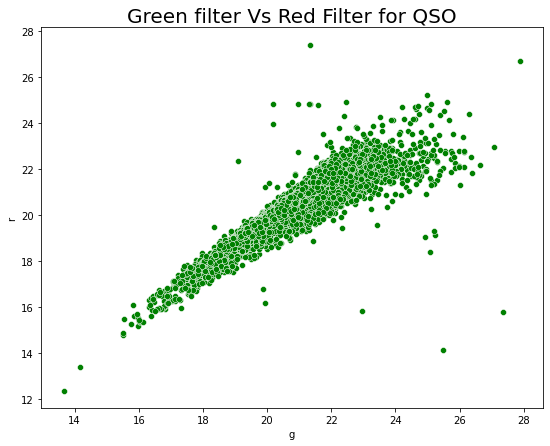

In [20]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=qso,color='green');
plt.title("Green filter Vs Red Filter for QSO",{'fontsize':20});

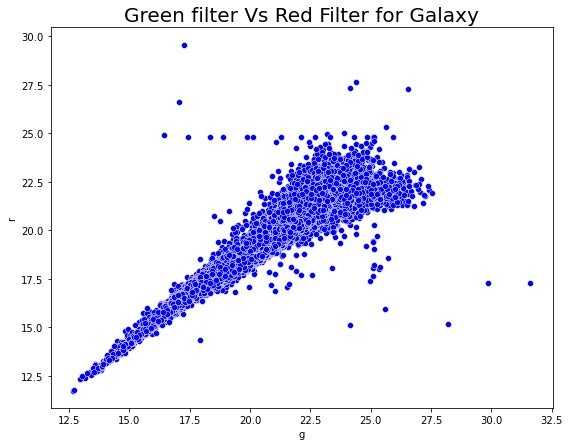

In [21]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=galaxy,color='b');
plt.title("Green filter Vs Red Filter for Galaxy",{'fontsize':20});

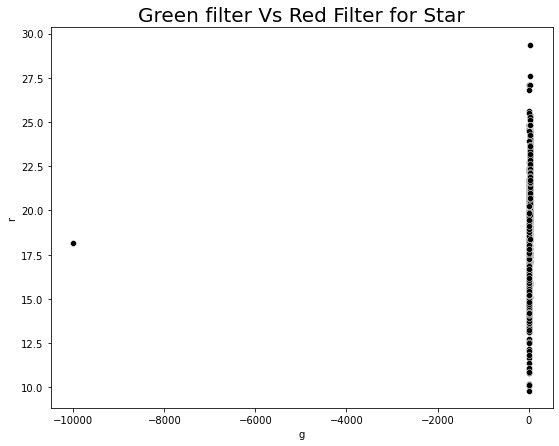

In [22]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=star,color='black')
plt.title("Green filter Vs Red Filter for Star",{'fontsize':20});

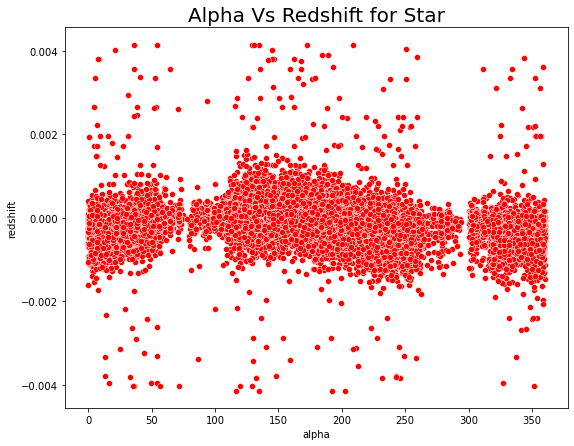

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=star,color='r');
plt.title("Alpha Vs Redshift for Star",{'fontsize':20});

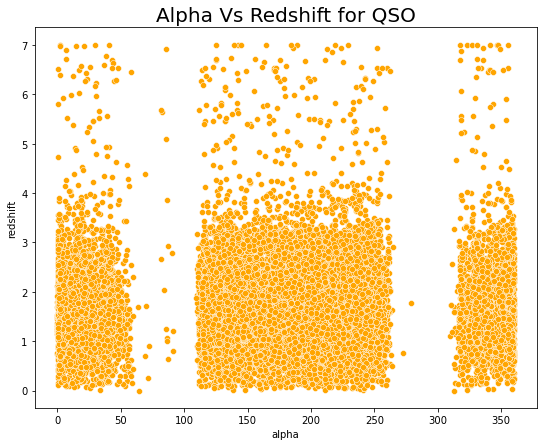

In [24]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=qso, color='orange');
plt.title("Alpha Vs Redshift for QSO",{'fontsize':20});

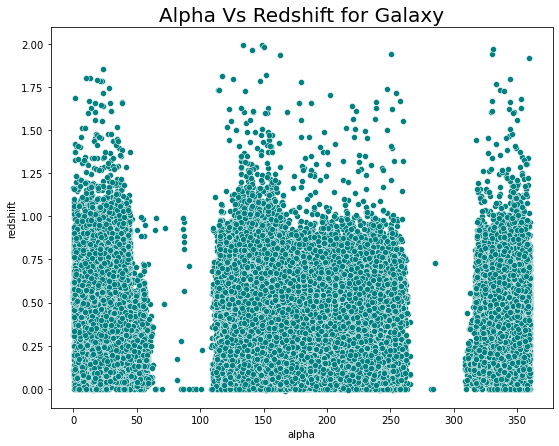

In [25]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='teal');
plt.title("Alpha Vs Redshift for Galaxy",{'fontsize':20});

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


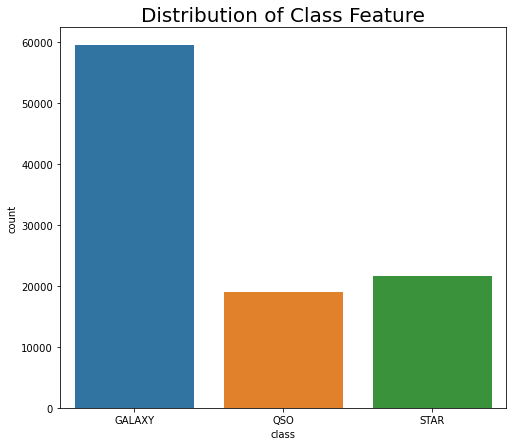

In [26]:
plt.figure(figsize=(8,7))
sns.countplot(df['class']);
plt.title("Distribution of Class Feature",{'fontsize':20});

## **Data Preprocessing**

In [27]:
df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift','class']]
df.head()

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


## **Define Target Variable (y) and Feature Variables (X)**

In [28]:
X = df.drop('class',axis=1)
y = df['class']

In [29]:
df['class'].dtype

dtype('O')

### Label Encoding

In [40]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y[::6]

array([0, 1, 2, ..., 0, 0, 0], dtype=int64)

## **Train Test Split**

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

In [43]:
import pickle
scalerfile = 'scalar.sav'
pickle.dump(scalar, open(scalerfile, 'wb'))

In [44]:
X_train

array([[ 0.09533567, -1.06725134,  0.04438766, ..., -0.1646618 ,
        -0.00972343, -0.30282684],
       [-1.41881632, -1.19241086, -0.03815582, ...,  0.18679965,
         0.01685515,  0.56483812],
       [ 1.15801074,  1.96409332, -0.05603579, ..., -0.4607181 ,
        -0.01116582, -0.79153146],
       ...,
       [ 0.27311243,  0.1832227 , -0.03769245, ..., -0.07330238,
         0.00731255,  1.35078734],
       [-0.27838382,  1.10575198,  0.02877916, ...,  0.79550086,
         0.04741997,  3.39419827],
       [ 1.86659186,  0.45960822, -0.03364555, ...,  0.12117784,
         0.01442607,  2.96073029]])

## **Modeling**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = {
    KNeighborsClassifier(n_neighbors=3):'K-Neighbors Classifier',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest Classifier'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",(model.score(X_test,y_test))*100,"%")

Accuracy Score for K-Neighbors Classifier is :  94.49 %
Accuracy Score for Support Vector Machine is :  96.07 %
Accuracy Score for Random Forest Classifier is :  97.86500000000001 %


## **Model Evaluation**

In [46]:
from sklearn.metrics import classification_report
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for : {name}")
    print(classification_report(y_test,y_pred))

Classification Report for : K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11943
           1       0.96      0.90      0.93      3778
           2       0.92      0.94      0.93      4279

    accuracy                           0.94     20000
   macro avg       0.94      0.93      0.94     20000
weighted avg       0.95      0.94      0.94     20000

Classification Report for : Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11943
           1       0.97      0.90      0.93      3778
           2       0.94      1.00      0.97      4279

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000

Classification Report for : Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98     

In [48]:
model

RandomForestClassifier()

## **Prediction**

In [62]:
scalar.transform([[251.031744, 31.840055, 23.25934, 22.93305, 21.72368, 20.44625, 19.73752, -0.000153]])

array([[ 0.75918534,  0.39252666,  0.03664962,  0.06827499,  1.117623  ,
         0.77194374,  0.03073714, -0.79086331]])

In [77]:
model.predict(scalar.transform([[135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794]]))

array([0], dtype=int64)

## Deployment

This project is deployed in Heroku Cloud as a Flask App.

> Deployed app link: https://stellar-classify.herokuapp.com/
****
> Github: https://github.com/MrDevLovePer/stellar-classification-main

## **Explaination**

The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. 

The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built.

This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

#### Model Selection
Initially tried KNN(3 has threshold), SVM initially. Then Random Forest Classifier boosted the Accuracy score.
Accuracy Score for K-Neighbors Classifier is :  94.5 %
Accuracy Score for Support Vector Machine is :  96 %
Accuracy Score for Random Forest Classifier is :  98 %